In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
#from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import norm
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

In [4]:
groups_df = pd.read_csv('Проект_2_groups.csv', sep=';')
groups_df

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [6]:
groups_add_df = pd.read_csv('Проект_2_group_add.csv', sep=',')
groups_add_df

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [8]:
groups_full_df = pd.concat([groups_df, groups_add_df], ignore_index=True)
groups_full_df

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74571,200247820,B
74572,201032527,B
74573,201067612,B
74574,201067653,B


In [13]:
active_studs_df = pd.read_csv('Проект_2_active_studs.csv', sep=',')
active_studs_df

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [19]:
groups_active_studs_df = groups_full_df.merge(active_studs_df, how='inner', left_on='id',
                                                               right_on='student_id')[['id', 'grp']]
groups_active_studs_df

,id,grp
0,1627,A
1,2085,B
2,2215,B
3,3391,A
4,3401,B
...,...,...
8336,5760471,B
8337,5777081,B
8338,5870856,A
8339,5945085,B


In [25]:
checks_df = pd.read_csv('Проект_2_checks.csv', sep=';')
checks_df

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


In [32]:
checks_groups_df = checks_df.merge(groups_active_studs_df, how='inner', left_on='student_id', 
                                                           right_on='id')[['student_id', 'grp', 'rev']]
checks_groups_df

,student_id,grp,rev
0,1627,A,990.0000
1,100300,B,990.0000
2,108270,B,290.0000
3,264473,B,1900.0001
4,274352,B,690.0000
...,...,...,...
387,5645737,B,1900.0000
388,5651566,B,1900.0000
389,5662322,B,1900.0000
390,5681918,B,1900.0000


In [33]:
checks_groups_a_df = checks_groups_df.loc[checks_groups_df.grp == 'A']
checks_groups_a_df

,student_id,grp,rev
0,1627,A,990.0
7,287008,A,1830.0
14,332387,A,2910.0
17,347455,A,2820.0
24,445767,A,3660.0
...,...,...,...
371,5394575,A,990.0
378,5545563,A,1160.0
382,5557468,A,290.0
383,5567520,A,489.0


In [34]:
checks_groups_b_df = checks_groups_df.loc[checks_groups_df.grp == 'B']
checks_groups_b_df

,student_id,grp,rev
1,100300,B,990.0000
2,108270,B,290.0000
3,264473,B,1900.0001
4,274352,B,690.0000
5,280036,B,199.0000
...,...,...,...
387,5645737,B,1900.0000
388,5651566,B,1900.0000
389,5662322,B,1900.0000
390,5681918,B,1900.0000


<AxesSubplot:xlabel='grp', ylabel='rev'>

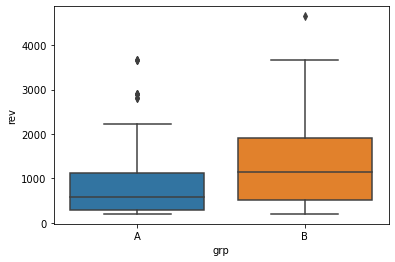

In [36]:
sns.boxplot(x='grp', y='rev', data=checks_groups_df)

In [50]:
# отсечение выборки по перцентилю
q_a = checks_groups_a_df.rev.quantile(q=0.9)
checks_groups_a_df.loc[checks_groups_a_df.rev <= q_a]

,student_id,grp,rev
0,1627,A,990.0
7,287008,A,1830.0
17,347455,A,2820.0
28,496794,A,580.0
39,720651,A,1980.0
...,...,...,...
371,5394575,A,990.0
378,5545563,A,1160.0
382,5557468,A,290.0
383,5567520,A,489.0


In [49]:
# отсечение выборки по перцентилю
q_b = checks_groups_b_df.rev.quantile(q=0.4)
checks_groups_b_df.loc[checks_groups_b_df.rev <= q_b]

,student_id,grp,rev
2,108270,B,290.0
4,274352,B,690.0
5,280036,B,199.0
6,284083,B,398.0
19,365174,B,690.0
...,...,...,...
376,5529834,B,290.0
377,5538992,B,290.0
379,5546326,B,840.0
380,5553945,B,690.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rev', ylabel='Density'>

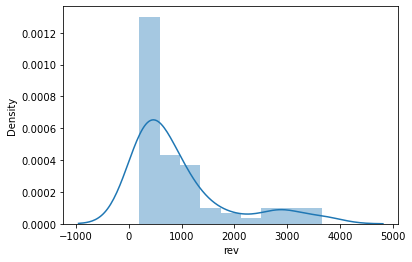

In [54]:
sns.distplot(checks_groups_a_df.rev)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rev', ylabel='Density'>

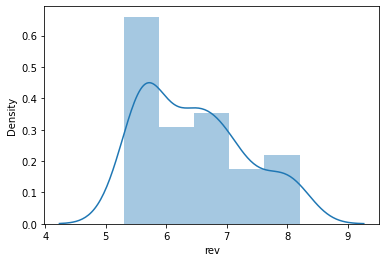

In [55]:
sns.distplot(np.log(checks_groups_a_df.rev))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rev', ylabel='Density'>

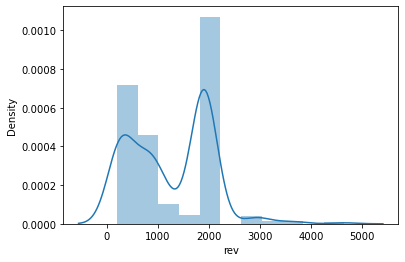

In [57]:
sns.distplot(checks_groups_b_df.rev)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rev', ylabel='Density'>

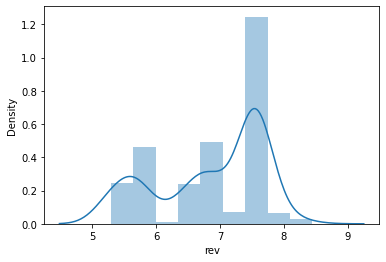

In [65]:
sns.distplot(np.log(checks_groups_b_df.rev))

In [71]:
shapiro(np.log(checks_groups_a_df.rev))

ShapiroResult(statistic=0.9057686924934387, pvalue=2.680935176613275e-05)

np.log(checks_groups_a_df.rev) sample is not normal (pvalue=2.680935176613275e-05)

In [70]:
shapiro(np.log(checks_groups_b_df.rev))

ShapiroResult(statistic=0.8419413566589355, pvalue=2.9242029102554055e-17)

np.log(checks_groups_b_df.rev) sample is not normal (pvalue=2.9242029102554055e-17)

So let's use bootstrap

In [140]:
def get_bootstrap(data1, data2, # two samples
                  boot_it=10000, # number of iterations
                  statistic=np.mean,
                  conf_level=0.95):
    boot_len = np.max([len(data1), len(data2)])
    boot_data = []
    for i in tqdm(range(boot_it)):
        sample1 = data1.sample(boot_len, replace=True).values
        sample2 = data2.sample(boot_len, replace=True).values
        boot_data.append(statistic(sample1 - sample2))
        
    boot_data_df = pd.DataFrame(boot_data)
    
    left_quant = (1 - conf_level) / 2
    right_quant = 1 - (1 - conf_level) / 2
    ci = boot_data_df.quantile([left_quant, right_quant])
    
    p_1 = norm.cdf(x=boot_data_df.quantile(right_quant), loc=np.mean(boot_data), scale=np.std(boot_data))
    p_2 = norm.cdf(x=boot_data_df.quantile(right_quant), loc=-np.mean(boot_data), scale=np.std(boot_data))
    
    p_value = min(p_1, p_2) * 2
        
        # Визуализация
    plt.hist(boot_data_df[0], bins = 50)
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/1000000 [00:00<?, ?it/s]

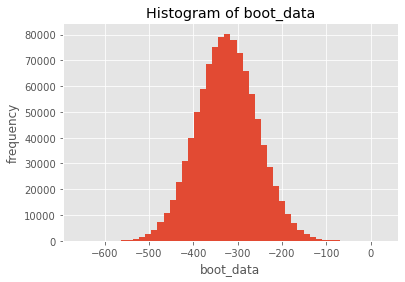

In [141]:
booted_data = get_bootstrap(checks_groups_a_df.rev, checks_groups_b_df.rev)

In [137]:
booted_data['p_value']

array([5.95639517e-14])

In [132]:
booted_data["ci"]

,0
0.025,-448.638229
0.975,-183.397221


In [134]:
norm.cdf(x=-1.96, loc=0, scale=1)

0.024997895148220435

In [157]:
'ASD'.lower()

'asd'

In [159]:
list(map(int, '123'))

[1, 2, 3]

In [161]:
len(set('123')&set('234'))

2

In [162]:
a = {'a': 1, 'b':2}

In [164]:
b = a['c']

KeyError: 'c'